## 분산분석


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols       # 4-1-1
from statsmodels.stats.anova import anova_lm  # 4-1-1

In [3]:
pd.options.display.float_format = '{:.4f}'.format   # 소수점 표현 setting

먼저 poison 데이터를 불러보겠습니다. poison 데이터는 아래의 url을 통해서 csv 파일의 형태로 다운로드 가능합니다. poison 데이터셋을 간단하게 살펴봅시다. 

In [4]:
path_file = "http://ranking.uos.ac.kr/class/VIS/data/" # insert poison file path
poi = pd.read_csv(path_file + 'poison.csv')
poi.head()

,time,poison,treat
0,0.3100,G1,A
1,0.4500,G1,A
2,0.4600,G1,A
3,0.4300,G1,A
4,0.3600,G2,A


데이터 값을 확률모형의 관점에서 보면 아래와 같이 분류할 수 있을 것입니다.
- 연속형 반응변수 : survival time
- 명목형 설명변수 : treatment and poison

이 poison 데이터는 어떤 실험의 결과를 정리한 것인지 알아보겠습니다.

- 데이터 설명
    + three poisons and (b) four treatments. Each combination of the two factors is used for four animals. The allocation to animals is completely randomized.
    + A data frame with 48 observations on the following 3 variables.
        * poison type of poison (1, 2, or 3)
        * treatment manner of treatment (1, 2, 3, or 4)
        * time time until death (hours)
    + These data are also available from OzDASL, the Australian Data and Story Library (https://dasl.datadescription.com/). (Note: The time measurements of the data at OzDASL are in units of tens of hours.)

Poison 데이터 분석에서 관심이 있는 것은 독성의 종류, 동물의 종류에 따른 생존시간의 차이일 것입니다. 기본적인 질문은  독성의 종류에 따라 혹은 동물의 종류에 따라 생존시간의 평균에 대한 차이가 있는지에 대한 것입니다.

이 질문에 대답하기 전에 먼저 데이터의 기초 통계량을 확인해봅시다. 기초통계량 및 데이터의 형식을 확인하기 위해서 아래 pandas 함수를 사용합니다.
+ 정보: info()
+ 데이터타입: dtypes
+ 요약통계량: describle(include ='all')
+ group_by를 활용한 기초통계량 구하기 

In [5]:
poi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    48 non-null     float64
 1   poison  48 non-null     object 
 2   treat   48 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [6]:
poi.dtypes

time      float64
poison     object
treat      object
dtype: object

In [7]:
poi.describe(include='all')

,time,poison,treat
count,48.0000,48,48
unique,NaN,3,4
top,NaN,G1,A
freq,NaN,16,12
mean,0.4794,NaN,NaN
std,0.2529,NaN,NaN
min,0.1800,NaN,NaN
25%,0.3000,NaN,NaN
50%,0.4000,NaN,NaN
75%,0.6225,NaN,NaN


In [8]:
poi.groupby(by=['poison', 'treat']).count()

time
poison treat      
G1     A         4
       B         4
       C         4
       D         4
G2     A         4
       B         4
       C         4
       D         4
G3     A         4
       B         4
       C         4
       D         4

In [9]:
poi.groupby(by=['poison']).mean()

,time
poison,
G1,0.6175
G2,0.5444
G3,0.2762


In [12]:
poi.groupby(by=['treat']).mean()

,time
treat,
A,0.3142
B,0.6767
C,0.3925
D,0.5342


주로 group_by 문을 이용하여 평균을 계산하고 비교하였습니다. 이렇게 통계량을 직접 비교하는 것은 집단의 차이를 직관적으로 이해하는데 큰 도움을 줄 수 있습니다. 하지만 지속적으로 평균의 차이를 모니터링 해야하거나 대규모 평균비교 작업을 매우 빠르게 해야하거나 혹은 평균 차이에 대한 과학적 추론 및 분석이 필요한 경우 ANOVA(Analysis of Variance)는 매우 편리한 분석도구 입니다.

우리에게 주어진 데이터에서 생존시간 평균의 차이를 독성의 종류, 동물의 종류에 따라 각각 분석을 할 수 있고 두 요인을 한꺼번에 고려하여 분석할 수도 있습니다.

분석도구는 아래와 같습니다

- statsmodels.formula.api 의 ols를 이용하여 일원(이원)배치 분산분석 모형 적합합니다.
- statsmodels.stats.anova 의 anova_lm을 이용하여 분산분석 테이블 확인합니다.
- 요인마다 제곱합(SS), 자유도(df)를 확인하고 F값과 p-value의 해석합니다.

(참고) statsmodels.formula.api 의 formula는 text 로 표현된 식을 입력 변수들로 parsing 해주는 기능을 가지고 있습니다. 예를 들어 "time~poison" 은 formula 에 대응하는 text 로 반응변수를 time으로 설명변수를 상수항과 poison 으로 설정합니다.

In [11]:
one_way_anova = ols('time ~ poison', poi).fit()
result_oneway = anova_lm(one_way_anova)
result_oneway

,df,sum_sq,mean_sq,F,PR(>F)
poison,2.0000,1.0330,0.5165,11.7860,0.0001
Residual,45.0000,1.9721,0.0438,NaN,NaN


- 일원분산분석과 마찬가지로 ols, anova_lm을 이용하여 이원분산분석 모형 적합합니다
- 분산분석 테이블을 이용하여 각 요인인 poison, treat에 따라서 집단간 반응변수의 평균의 차이가 있는지 확인합니다.
- poison * treat의 교호작용 확인

In [12]:
two_way_anova = ols('time ~ poison + treat', poi).fit()
result_twoway = anova_lm(two_way_anova)
result_twoway

,df,sum_sq,mean_sq,F,PR(>F)
poison,2.0000,1.0330,0.5165,20.6433,0.0000
treat,3.0000,0.9212,0.3071,12.2727,0.0000
Residual,42.0000,1.0509,0.0250,NaN,NaN


formula에 poison * treat 를 사용하여 교호작용을 확인할 수 있습니다.

In [13]:
two_way_anova = ols('time ~ poison + treat+ poison*treat', poi).fit()
result_twoway = anova_lm(two_way_anova)
result_twoway

,df,sum_sq,mean_sq,F,PR(>F)
poison,2.0000,1.0330,0.5165,23.2217,0.0000
treat,3.0000,0.9212,0.3071,13.8056,0.0000
poison:treat,6.0000,0.2501,0.0417,1.8743,0.1123
Residual,36.0000,0.8007,0.0222,NaN,NaN


ANOVA의 결과 p-value를 통해 평균의 차이 교호효과의 유무를 확인할 수 있습니다. 그렇다면 ANOVA의 결과를 어떻게 시각화할 수 있을까요? p-value를 보여주는 것이 효과적일까요?

만약 평균비교를 매우 빈번하게 해야하고 평균의 차이에 대한 유무만을 확인하는 것이 목적이라면 p-value의 값을 막대그래프로 보여주는 것이 유용할 것입니다. 하지만 p-value는 평균의 차이가 있는지 그렇지 않은지를 나타낼 뿐 평균의 차이 혹은 그룹간의 평균값을 보여주지는 않습니다. 따라서 그룹의 평균을 직접 시각화하는 것이 유용한 경우가 많습니다. 

아래와 같이 ANOVA의 분석결과를 시각화 해봅시다.
- 종속변수 time의 독립변수 poison에 대한 상자그림과 산점도를 그립니다.
- poison에 따른 time의 평균과 분포는 어떤 차이를 확인합니다
- poison 변수의 값을 기준으로 데이터를 나누기 위해서 값을 확인해봅니다.

In [15]:
poi['poison'].value_counts()

G1    16
G2    16
G3    16
Name: poison, dtype: int64

- 확인한 poison의 값을 이용하여 데이터를 나눕니다. 

In [16]:
x1 = poi['time'][poi['poison']=='G1']
x2 = poi['time'][poi['poison']=='G2']
x3 = poi['time'][poi['poison']=='G3']

- 그래픽 스타일을 'ggplot'으로 변경합니다.

In [17]:
plt.style.use('ggplot')

- 집단별로 상자그림을 그립니다.

Text(0, 0.5, 'Y: time')

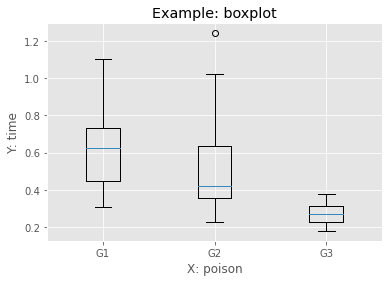

In [18]:
fig, ax = plt.subplots()
ax.boxplot([x1,x2,x3])
ax.set_xticks([1,2,3],['G1','G2','G3'])
ax.set_title('Example: boxplot')
ax.set_xlabel("X: poison")
ax.set_ylabel("Y: time")

- 분산분석을 위한 기초통계량을 계산합니다.
  + groupby 를 이용하여 평균과 분산을 계산합니다.
  + 계산된 결과를 합쳐서 출력합니다. 

In [19]:
mean = poi.groupby(['poison', 'treat'])['time'].mean()
std = poi.groupby(['poison', 'treat'])['time'].std()
mean.name = 'mean'
std.name = 'std'
summary_1 = pd.concat([mean, std], axis=1)
summary_1

mean    std
poison treat              
G1     A     0.4125 0.0695
       B     0.8800 0.1608
       C     0.5675 0.1567
       D     0.6100 0.1128
G2     A     0.3200 0.0753
       B     0.8150 0.3363
       C     0.3750 0.0569
       D     0.6675 0.2710
G3     A     0.2100 0.0216
       B     0.3350 0.0465
       C     0.2350 0.0129
       D     0.3250 0.0265

- agg 함수를 이용하면 간단한 표현이 가능합니다.

In [20]:
summary_2 = poi.groupby(['poison', 'treat'])['time'].agg(['mean', 'std']).round(4)
summary_2

mean    std
poison treat              
G1     A     0.4125 0.0695
       B     0.8800 0.1608
       C     0.5675 0.1567
       D     0.6100 0.1128
G2     A     0.3200 0.0753
       B     0.8150 0.3363
       C     0.3750 0.0569
       D     0.6675 0.2710
G3     A     0.2100 0.0216
       B     0.3350 0.0465
       C     0.2350 0.0129
       D     0.3250 0.0265

In [21]:
tmp=summary_2['mean'].reset_index()
tmp['poison'].unique()

array(['G1', 'G2', 'G3'], dtype=object)

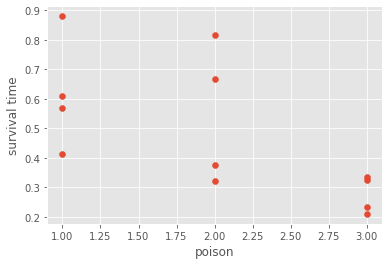

In [39]:
xaxis_poison = np.concatenate([np.ones(4), np.ones(4)*2, np.ones(4)*3])
plt.scatter(xaxis_poison, summary_2['mean'].to_numpy())
plt.xlabel('poison')
plt.ylabel('survival time')
plt.show()

위에서 적합해 놓은 one_way_anova에 anova 분석에서 residual 이 저장되어 있습습니다. 잔차검정 (residual test)를 위해 sklearn의 statmodel.qqplot() 함수를 이용하여 Q-Q plot을 그려보겠습니다. 

이는 ANOVA분석 결과로 얻게 되는 p-value에 대한 모형가정 검토입니다.  잔차검정을 통해 확인해야 하는 것은 모형이 정규분포를 따르는가에 대한 것이라기 보다는 꼬리쪽 분포의 두께가 두꺼운가, 데이터 index에 대한 의존성이 있는지, 기울어진 분포인지에 대한 것입니다. 

- Q-Q 플롯은 표준정규분포의 이론적 분위수와 관측치의 분위수 값을 비교하여 분포의 꼬리의 두께, 분포의 대칭성등을 파악할 수 있는 시각화 도구입니다. 
    + y축: 표준화된 잔차
    + x축: (데이터의 분위수에 대응되는) 표준정규분포의 Z-value 

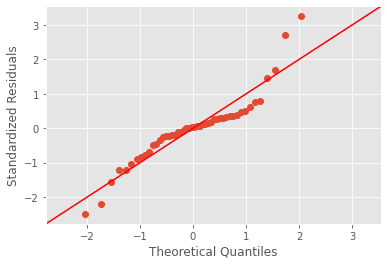

In [47]:
res = np.array(two_way_anova.resid)
std_res = res/two_way_anova.resid.std()
sm.qqplot(std_res, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

위 QQ-plot을 확인해보면 분포의 오른쪽 끝(x축 양끝값)에서  이론적인 분위수(x축값)보다 표준화된 분위수의 값이 훨씬 크다는 것을 알 수 있습니다. 

정규분포를 가정하였을 때 약 1등은 $2$ 의 값을 가져야 할 것으로 보이나 실제로는  $3$ 의 값을 가지는 것으로 나타났음을 의미합니다. 즉, 정규분포포다 극단적으로 더 큰값이 잘 나타난 것입니다. 반대로 하위 1등은 데이터가 정규분포를 따른다면 $-2$의 값을 가져야 하겠지만 그 보다 작은 값을 가짐을 확인할 수 있습니다. 

위 결론으로 분포의 꼬리가 두껍다는 것을 알 수 있습니다.

여기서 반응 변수로 사용하는 time 변수를 1/time으로 분석하면 residual 에 대한 우리의 가정을 좀 더 신뢰할 수 있습니다.

In [22]:
poi["time_inv"] = 1/poi['time']

In [23]:
two_way_anova_c = ols('time_inv ~ poison * treat', poi).fit()

In [24]:
result_twoway = anova_lm(two_way_anova_c)
result_twoway

,df,sum_sq,mean_sq,F,PR(>F)
poison,2.0000,34.8771,17.4386,72.6347,0.0000
treat,3.0000,20.4143,6.8048,28.3431,0.0000
poison:treat,6.0000,1.5708,0.2618,1.0904,0.3867
Residual,36.0000,8.6431,0.2401,NaN,NaN


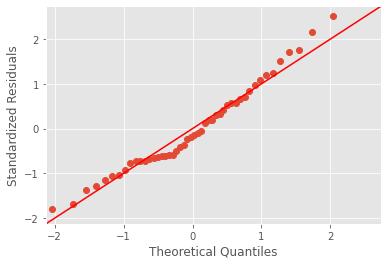

In [25]:
res = np.array(two_way_anova_c.resid)
std_res = res/two_way_anova_c.resid.std()
sm.qqplot(std_res, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

- 잔차의 히스토그램 그리기

Text(0, 0.5, 'Frequency')

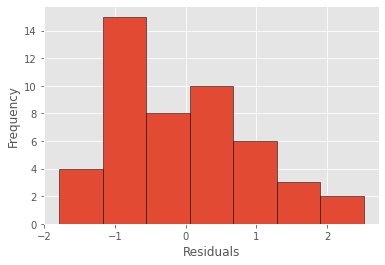

In [26]:
fig, ax = plt.subplots()
ax.hist(std_res, bins='auto', histtype='bar', ec='k') 
ax.set_xlabel('Residuals')
ax.set_ylabel('Frequency')